# Ковариация

## Диаграмма рассеивания

In [2]:
# импортируем библиотеки
import numpy as np
import pandas as pd
from scipy import stats 
import matplotlib.pyplot as plt
import seaborn as sns

# загружаем датасет
pkmn = pd.read_csv('data/pkmn.csv')

# приводим заголовки полей к snake_case
pkmn.columns = pkmn.columns.str.lower().str.replace(' ', '_')

pkmn.columns

Index(['index', 'pokedex_number', 'name', 'type1', 'type2', 'gym.section',
       'attack', 'base_total', 'defense', 'experience_growth', 'hp',
       'sp_attack', 'sp_defense', 'speed', 'generation', 'is_legendary',
       'level', 'additional.criteria', 'location', 'average.level',
       'against_bug', 'against_dark', 'against_dragon', 'against_electric',
       'against_fight', 'against_fire', 'against_flying', 'against_ghost',
       'against_grass', 'against_ground', 'against_ice', 'against_normal',
       'against_poison', 'against_psychic', 'against_rock', 'against_steel',
       'against_water'],
      dtype='object')

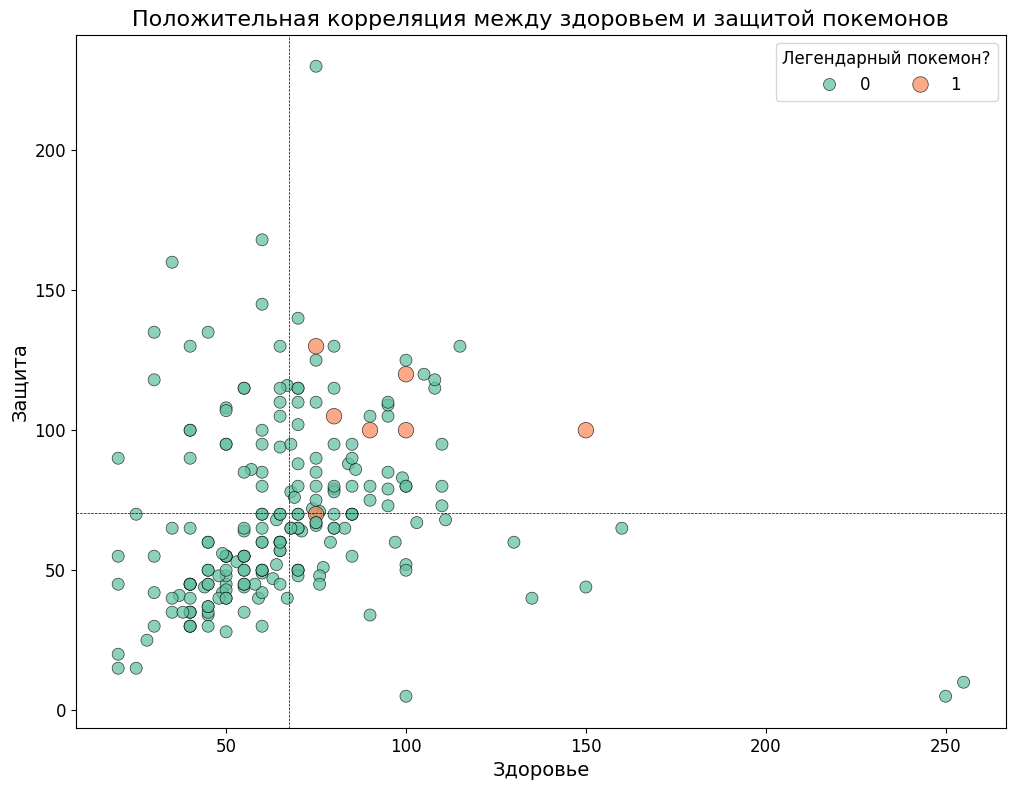

In [3]:
# задачем размеры фигуры
plt.figure(figsize = (12, 9))

# расчитываем средние значения для отображения линий
hp_avg = pkmn['hp'].mean()
defense_avg = pkmn['defense'].mean()

# формируем график
sns.scatterplot(x = pkmn['hp'], # здоровье
                y = pkmn['defense'], # защита
                hue = pkmn['is_legendary'], # флаг легендарного покемона
                palette = 'Set2', # цветовая палитра
                size = pkmn['is_legendary'], # зависимость размера от флага
                sizes = (125, 75), # настройка размеров маркера
                alpha=0.75, # уровень прозрачности маркера
                edgecolor='black', # цвет границы маркера
                linewidth = 0.5 # толщина границы маркера
            )

# настраиваем подписи
plt.title('Положительная корреляция между здоровьем и защитой покемонов', fontsize=16) 
plt.xlabel('Здоровье', fontsize = 14)
plt.xticks(fontsize = 12)
plt.ylabel('Защита', fontsize = 14)
plt.yticks(fontsize = 12)

# настройка легенды
plt.legend(title = 'Легендарный покемон?', # заголовок легенды
           title_fontsize = 12, # размер шрифта заголовка легенды
           fontsize = 12, # размер шрифта 
           loc='upper right', # положение легенды
           ncol = 2) # количество заголовков

# линии средних занчений
plt.axvline(hp_avg, linestyle = '--', color = 'black', linewidth = 0.5)
plt.axhline(defense_avg, linestyle = '--', color = 'black', linewidth = 0.5)

# отобразить график
plt.show()

# Корреляция

In [4]:
from scipy.stats import pearsonr
# рассчитаем корреляцию показателей здоровья (hp) и защиты (defense)

# подготовка данных
# удаляем пустые строки
pkmn_clear = pkmn[['hp', 'defense']].dropna()

# рассчитаем ковариацию
hp_def_cov = np.cov(pkmn_clear['hp'], pkmn_clear['defense'])[0, 1]

# рассчитаем стандартное отклонение
hp_std = pkmn_clear['hp'].std()
def_std = pkmn_clear['defense'].std()

# Вычисляем коэффициент корреляции Пирсона
r = hp_def_cov / (hp_std * def_std)

# проверяем через встроенную функцию
r_scipy, _ = pearsonr(pkmn_clear['hp'], pkmn_clear['defense'])

print(f'Ручной рассчет {r:.2f}')
print(f'Проверка через встроенную функцию {r_scipy:.2f}')

# пришем выводы
if r < 0.3:
    print('Корреляция меньше 0.3 - очень слабая корреляция')
elif 0.3 <= r < 0.5:
    print('Корреляция в диапазоне от 0.3 до 0.5 - слабая корреляция')
elif 0.5 <= r < 0.7:
    print('Корреляция в лиапазоне от 0.5 до 0.7 - умеренная корреляция')
elif 0.7 <= r < 0.9:
    print('Корреляция в диапазоне от 0.7 до 0.9 - сильная корреляция')
else:
    print('Корреляция > 0.9 - очень сильная корреляция')


Ручной рассчет 0.11
Проверка через встроенную функцию 0.11
Корреляция меньше 0.3 - очень слабая корреляция


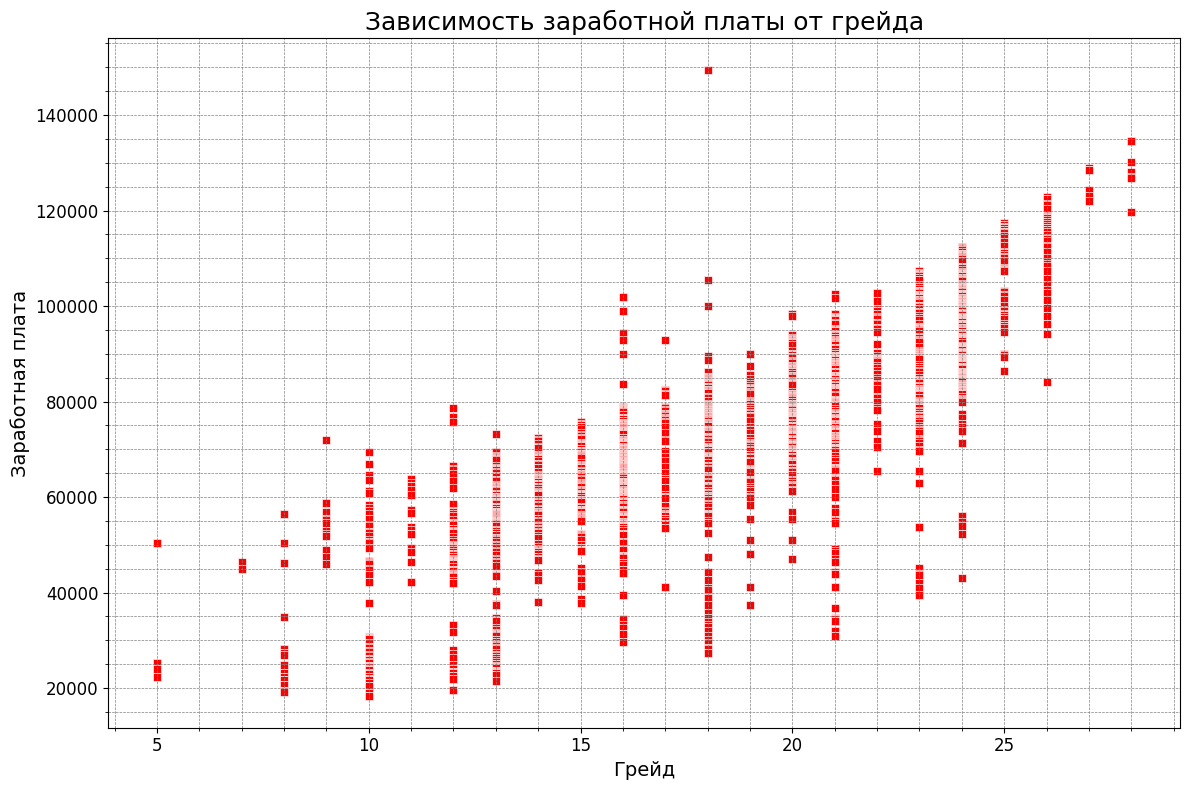

In [5]:
emp = pd.read_csv('data/emp.csv')
# Копируем исходный DataFrame
emp_clear = emp.copy()

# Конвертируем 'Grade' в числовой тип
emp_clear['Grade'] = pd.to_numeric(emp_clear['Grade'], errors='coerce')

# Сортируем по зарплате (по убыванию)
emp_clear = emp_clear.sort_values(by='Base_Salary', ascending=False)

# Удаляем строки с NaN
emp_clear = emp_clear.dropna()

# Задаем размеры фигуры для графика
plt.figure(figsize=(12, 8))

# Точечный график
sns.scatterplot(
    y='Base_Salary',
    x='Grade',
    data=emp_clear,
    marker='s',     # квадраты
    color='red',    # цвет точек
    edgecolor='white'  # белые границы
)

# Включаем минорный гридлайн
plt.minorticks_on()

# Настройка гридлйнов
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

# Заголовок и подписи осей
plt.title('Зависимость заработной платы от грейда', size=18)
plt.xlabel('Грейд', fontsize=14)
plt.ylabel('Заработная плата', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# автонастрйока размеров
plt.tight_layout()

plt.show()

## SciPy


In [6]:
# Выполним расчет коэффициента корреляции Пирсона с помощью библиотеки SciPy

corr = stats.pearsonr(emp_clear['Grade'], emp_clear['Base_Salary']).statistic

print(corr)

0.8217974113484171


## Pandas


In [7]:
# Выполним расчет коэффициента корреляции Пирсона с помощью библиотеки Pandas

corr_pd = emp_clear[['Grade', 'Base_Salary']].corr()

print(corr_pd.iloc[0,1])

0.8217974113484144


# Сравнение категорий

## Среднее по группе

## barchart

In [8]:
# импортируем данные 
games = pd.read_csv('data/games_data.csv', encoding = 'windows-1251')

# взглянем на данные
display(games.sample(5))

# подрробнее
display(games.describe())
display(games.info())

C:\Users\user\AppData\Local\Temp\ipykernel_6448\2565183194.py:2: DtypeWarning: Columns (10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  games = pd.read_csv('data/games_data.csv', encoding = 'windows-1251')


,id,title,release_date,developer,publisher,genres,multiplayer_or_singleplayer,price,dc_price,overall_review,detailed_review,reviews,percent_positive,win_support,mac_support,lin_support
52567,52567.0,Button Frenzy,2016-07-08,zerofiftyone,zerofiftyone,Casual;Indie,Single-player;Steam Achievements;Full controll...,42,42,NaN,NaN,NaN,NaN,1.0,0.0,0.0
30394,30394.0,Stay Alive: Apocalypse,2018-01-15,Mehan Games,Mehan Games,Indie;RPG;Simulation;Early Access,Single-player;Steam Achievements;Steam Trading...,880,880,Mixed,Mixed,3645,59%,1,0.0,0.0
18366,18366.0,Save Your Nuts,NaN,NaN,NaN,NaN,NaN,349,349,Positive,Mixed,1299,55%,1,1.0,1.0
9250,9250.0,LONGING RING OF ESCA,NaN,NaN,NaN,NaN,NaN,529,529,Mixed,Very Positive,74,94%,1,0.0,0.0
48633,48633.0,Slams City. Hitler's Escape.,NaN,NaN,NaN,NaN,NaN,42,42,NaN,NaN,NaN,NaN,1.0,1.0,0.0


,id,mac_support,lin_support
count,73340.000000,73340.000000,73340.000000
mean,36670.030215,0.214644,0.149509
std,21172.371335,0.410578,0.356592
min,0.000000,0.000000,0.000000
25%,18334.750000,0.000000,0.000000
50%,36669.500000,0.000000,0.000000
75%,55004.250000,0.000000,0.000000
max,73343.000000,1.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73344 entries, 0 to 73343
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           73340 non-null  float64
 1   title                        73340 non-null  object 
 2   release_date                 23281 non-null  object 
 3   developer                    23280 non-null  object 
 4   publisher                    23272 non-null  object 
 5   genres                       23281 non-null  object 
 6   multiplayer_or_singleplayer  23281 non-null  object 
 7   price                        73340 non-null  object 
 8   dc_price                     73340 non-null  object 
 9   overall_review               36875 non-null  object 
 10  detailed_review              36865 non-null  object 
 11  reviews                      36865 non-null  object 
 12  percent_positive             36865 non-null  object 
 13  win_support     

None

In [9]:
# проверим на nan
display(games.isna().sum())

# избавимся от строк без даты релиза
filtered_games = games.dropna(subset = ['release_date', 'percent_positive'])

id                                 4
title                              4
release_date                   50063
developer                      50064
publisher                      50072
genres                         50063
multiplayer_or_singleplayer    50063
price                              4
dc_price                           4
overall_review                 36469
detailed_review                36479
reviews                        36479
percent_positive               36479
win_support                        9
mac_support                        4
lin_support                        4
dtype: int64

In [10]:
# проверим на nan
display(filtered_games.info())

<class 'pandas.core.frame.DataFrame'>
Index: 17162 entries, 0 to 38180
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           17162 non-null  float64
 1   title                        17162 non-null  object 
 2   release_date                 17162 non-null  object 
 3   developer                    17162 non-null  object 
 4   publisher                    17155 non-null  object 
 5   genres                       17162 non-null  object 
 6   multiplayer_or_singleplayer  17162 non-null  object 
 7   price                        17162 non-null  object 
 8   dc_price                     17162 non-null  object 
 9   overall_review               17145 non-null  object 
 10  detailed_review              17162 non-null  object 
 11  reviews                      17162 non-null  object 
 12  percent_positive             17162 non-null  object 
 13  win_support          

None

In [11]:
# расставим типы данных

# для столбца id
filtered_games['id'] = filtered_games['id'].astype('str')

# для столбца release_date
filtered_games['release_date'] = pd.to_datetime(filtered_games['release_date'])

# для столбца price
filtered_games['price'] = filtered_games['price'].replace('Free to play', 0)
filtered_games['price'] = filtered_games['price'].astype(str).str.replace(',', '.')
filtered_games['price'] = filtered_games['price'].astype(float)

# для столбца dc_price 
filtered_games['dc_price'] = filtered_games['dc_price'].replace('Free to play', 0)
filtered_games['dc_price'] = filtered_games['dc_price'].astype(str).str.replace(',', '.')
filtered_games['dc_price'] = filtered_games['dc_price'].astype(float)

# для столбца percent_positive
filtered_games['percent_positive'] = filtered_games['percent_positive'].astype(str).str.replace('%', '')
filtered_games['percent_positive'] = filtered_games['percent_positive'].astype(float)

# для столбца reviews
filtered_games['reviews'] = filtered_games['reviews'].astype(int)

display(filtered_games.info())

<class 'pandas.core.frame.DataFrame'>
Index: 17162 entries, 0 to 38180
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           17162 non-null  object        
 1   title                        17162 non-null  object        
 2   release_date                 17162 non-null  datetime64[ns]
 3   developer                    17162 non-null  object        
 4   publisher                    17155 non-null  object        
 5   genres                       17162 non-null  object        
 6   multiplayer_or_singleplayer  17162 non-null  object        
 7   price                        17162 non-null  float64       
 8   dc_price                     17162 non-null  float64       
 9   overall_review               17145 non-null  object        
 10  detailed_review              17162 non-null  object        
 11  reviews                      17162 non-null  i

C:\Users\user\AppData\Local\Temp\ipykernel_6448\3802808617.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_games['id'] = filtered_games['id'].astype('str')
C:\Users\user\AppData\Local\Temp\ipykernel_6448\3802808617.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_games['release_date'] = pd.to_datetime(filtered_games['release_date'])
C:\Users\user\AppData\Local\Temp\ipykernel_6448\3802808617.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

None

In [12]:
# добавим столбев с годом для агрегации

filtered_games['year'] = filtered_games['release_date'].dt.year

C:\Users\user\AppData\Local\Temp\ipykernel_6448\3797906813.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_games['year'] = filtered_games['release_date'].dt.year


In [16]:
# агрегируем среднюю оценку вышедших игр по годам

# оставим данные только за последние 10 лет

filtered_games = filtered_games.query('year >= 2005 & year <= 2015')

# найдем среднюю оценку по году для 
avg_rating = filtered_games.groupby('year')['percent_positive'].mean().reset_index()

### Matplotlib

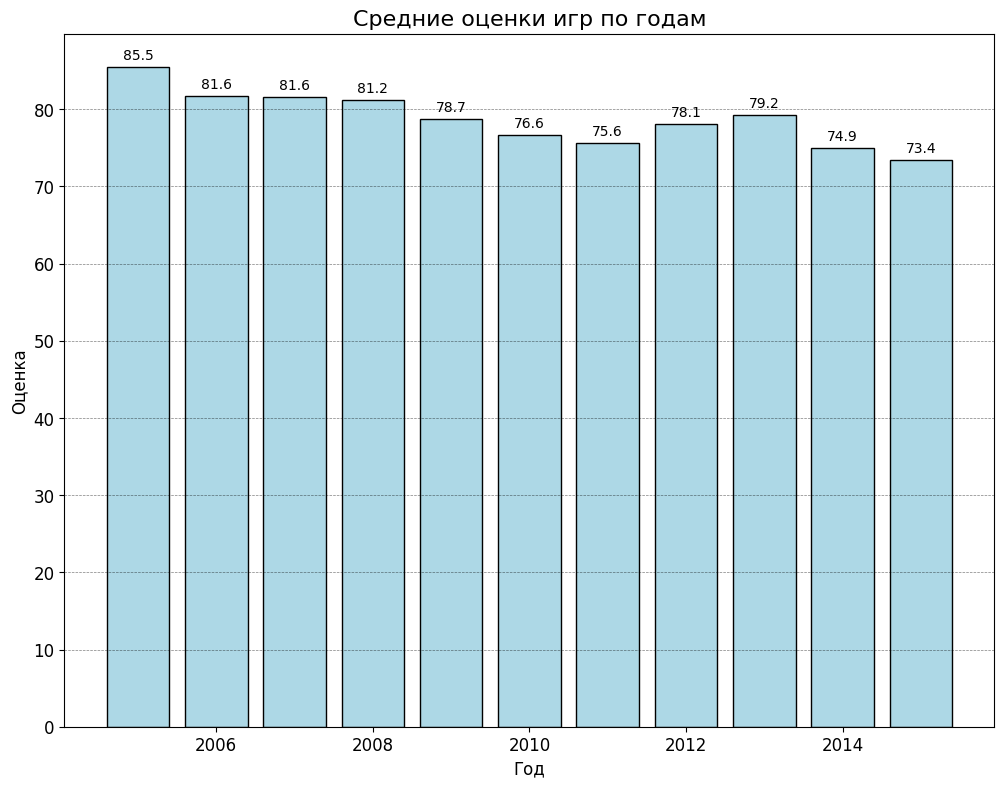

In [14]:
plt.figure(figsize = (12, 9))

bars = plt.bar(x = avg_rating['year'],
        height = avg_rating['percent_positive'],
        color = 'lightblue',
        edgecolor = 'black'             
        )

# Добавляем аннотации над столбцами
for bar in bars:
    label = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        label + 1,
        f'{label:.1f}',  # форматирование числа
        ha='center',  # выравнивание по центру
        fontsize=10
    )

# Подписи
plt.xlabel('Год', size = 12)
plt.xticks(size = 12)
plt.ylabel('Оценка', size = 12)
plt.yticks(size = 12)
plt.title('Средние оценки игр по годам', size = 16)

# grid
plt.grid(axis = 'y', alpha = 0.5, linestyle = '--', color = 'black', linewidth = 0.5)

plt.show()

### Seaborn

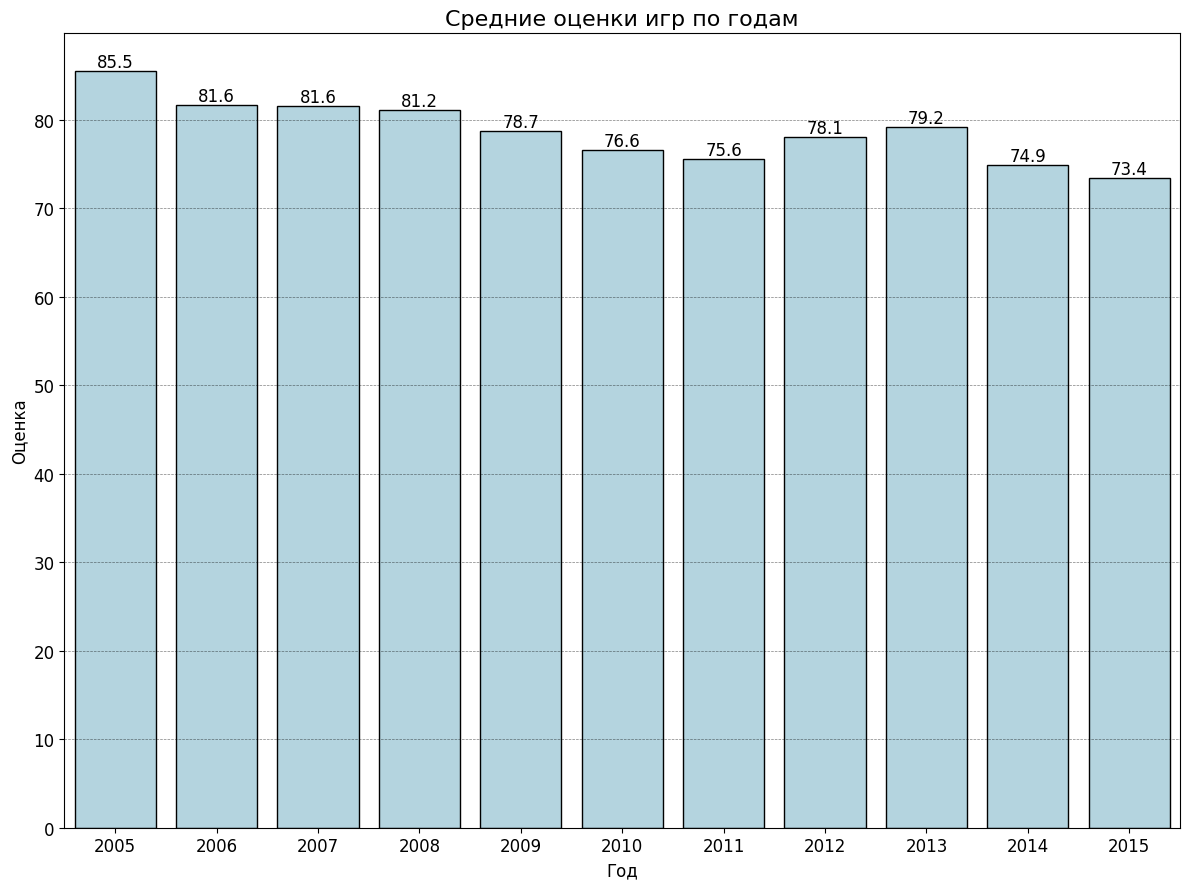

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 9))

bars = sns.barplot(
    data=avg_rating,
    x='year',
    y='percent_positive',
    color='lightblue',
    edgecolor='black'
)

# Добавляем аннотации над каждым столбцом
for bar in bars.patches:
    # Получаем высоту столбца
    height = bar.get_height()
    
    # Добавляем текст над столбцом
    bars.annotate(
        f'{height:.1f}', 
        (bar.get_x() + bar.get_width() / 2, height),  # центр столбца по X, высота по Y
        ha='center',  
        va='bottom',  
        fontsize=12  
    )

# Подписи
plt.xlabel('Год', size=12)
plt.xticks(size=12)
plt.ylabel('Оценка', size=12)
plt.yticks(size=12)
plt.title('Средние оценки игр по годам', size=16)

# grid
plt.grid(axis='y', alpha=0.5, linestyle='--', color='black', linewidth=0.5)

plt.tight_layout()
plt.show()

## boxplot

### Seaborn

Поскольку столбец это по сути скалярное значение, такое отображение не является очень наглядным и пригодным для детального анализа. Попробуем построить ящик с усами и убедимся, что в данному случае он предоставляет больше информации для анализа.

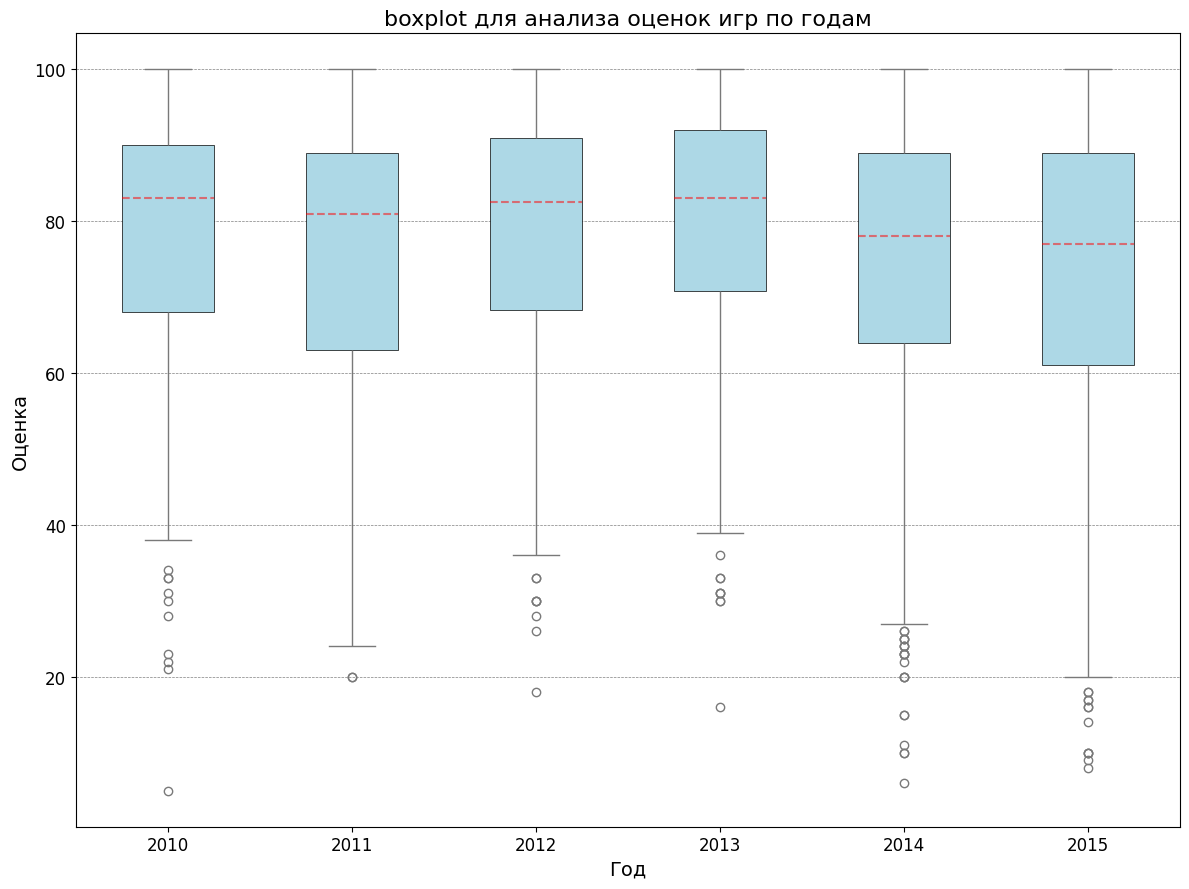

In [76]:
filtered_games_2 = filtered_games.query('year >= 2010 & year <= 2015')

plt.figure(figsize = (12, 9))

boxplot = sns.boxplot(x = 'year',
                      y = 'percent_positive',
                      width = 0.5,
                      data = filtered_games_2,
                      color = 'lightblue',
                      saturation = 0.5,            
                      showfliers = True,
                      medianprops = {'color': 'red', 
                                     'linewidth': 1.5, 
                                     'linestyle': '--',
                                    'alpha' : 0.5},
                      boxprops = {'facecolor': 'lightblue', 
                                  'edgecolor': 'black', 
                                  'linewidth': 0.5}
)

# Подписи
plt.xlabel('Год', size=14)
plt.xticks(size=12)
plt.ylabel('Оценка', size=14)
plt.yticks(size=12)
plt.title('boxplot для анализа оценок игр по годам', size=16)

# grid
plt.grid(axis='y', alpha=0.5, linestyle='--', color='black', linewidth=0.5)

plt.tight_layout()
plt.show()

#overall_review               detailed_review

**Сравнение ящиков с усами**  
Для анализа различий между группами с использованием диаграмм типа "ящик с усами" (boxplot) необходимо рассмотреть несколько ключевых характеристик:  

* `Медианы групп` — это центральная линия внутри каждого ящика. Различие медиан является одним из самых явных признаков того, что распределения данных в группах существенно отличаются друг от друга.  
* `Размеры ящиков отражают межквартильный размах (IQR)` Чем шире ящик, тем больше разброс значений в соответствующей группе. Это позволяет оценить степень вариации данных внутри каждой категории.  
* `Длина усов` также может быть полезной для сравнения. Усы показывают диапазон данных, исключая выбросы. Если длина усов значительно различается между группами, это указывает на различия в распределении значений.  
* `Наличие выбросов` — точек, которые выделяются за пределами усов — говорит о наличии аномальных или редких значений. Присутствие таких выбросов в определённых группах может свидетельствовать о специфических особенностях данных и требует дополнительного внимания при интерпретации результатов.